# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [2]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt


**Step 2:** Load the dataset _(done for you)_.

In [3]:

iris_data = load_iris()


In [5]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
    # YOUR CODE HERE
    iris = iris_data
    
    #put the dataset into a pandas DF using the feature names as columnsç ????
    df = pd.DataFrame( iris.data,columns= iris['feature_names'])
    
    #rename the column name so the dont include the '(cm)'
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width'] 
    
    #add 2 columns one with the target and another with the target_names
    df['target'] = iris.target
    df['class'] = iris.target_names[iris.target]
    
    #print(df.head()) 
    return df
    
df_iris = create_df()
df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
133,6.3,2.8,5.1,1.5,2,virginica
27,5.2,3.5,1.5,0.2,0,setosa
34,4.9,3.1,1.5,0.2,0,setosa
144,6.7,3.3,5.7,2.5,2,virginica
119,6.0,2.2,5.0,1.5,2,virginica
145,6.7,3.0,5.2,2.3,2,virginica
140,6.7,3.1,5.6,2.4,2,virginica
36,5.5,3.5,1.3,0.2,0,setosa


In [6]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [24]:

#From our data we will only get variable columns as np.array
x = 0
# YOUR CODE HERE
x = iris_data.data
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [20]:
mergings = 0 
# YOUR CODE HERE
# Use the linkage() function
mergings = linkage(x, method = 'complete')

In [19]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

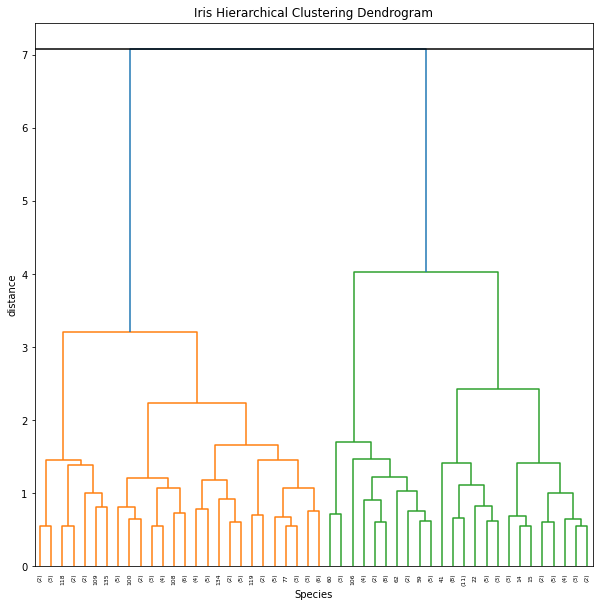

In [49]:
dn = 0
iris_SP = df_iris[['sepal length', 'sepal width', 'petal length', 'petal width']]
# YOUR CODE HERE
plt.figure(figsize=(10, 10))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dn = dendrogram(mergings, truncate_mode='lastp',p=50, leaf_rotation=90, leaf_font_size=6)
max_d = 7.08    # threshold
plt.axhline(y=max_d, c='k')
plt.show()


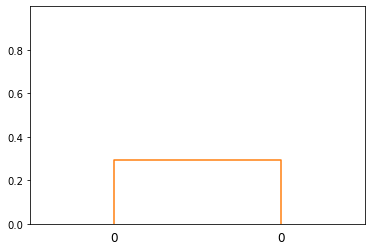

In [50]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [76]:
from sklearn.cluster import KMeans

df = pd.read_csv('./datasets/ch1ex1.csv')
points = df.values

new_df = pd.read_csv('./datasets/ch1ex2.csv')
new_points = new_df.values


**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [77]:
model = 0
# YOUR CODE HERE
model = KMeans(n_clusters = 3, random_state=0)

In [78]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [79]:
# YOUR CODE HERE
model.fit(points)

KMeans(n_clusters=3, random_state=0)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [80]:
# YOUR CODE HERE
labels = model.predict(points)


In [81]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [87]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []

    # YOUR CODE HERE
    for i in labels:
        if i == 0:
            data_0.append(i)
        elif i == 1:
            data_1.append(i)
        else:
            data_2.append(i)
    data_0 = np.array(data_0)
    data_1 = np.array(data_1)
    data_2 = np.array(data_2)
    
    return data_0,data_1,data_2


data_0,data_1,data_2 =separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(111,)
(95,)
(94,)


In [88]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

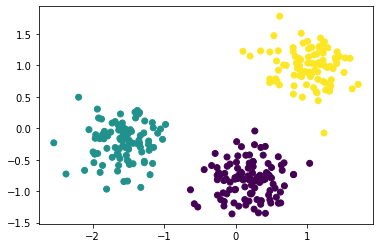

In [111]:
# plotting the data 

# YOUR CODE HERE
#plt.scatter(df['0'],df['1'], marker='o')  # simply or color
plt.scatter(df['0'], df['1'], c=labels, cmap='viridis')

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [117]:
# YOUR CODE HERE

new_labels = model.predict(new_points)

In [113]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [123]:
#separate the data by labels like we did before

new_0 = []
new_1 = []
new_2 = []
for i in new_labels:
    if i == 0:
        new_0.append(i)
    elif i == 1:
        new_1.append(i)
    else:
        new_2.append(i)
new_0 = np.array(new_0)
new_1 = np.array(new_1)
new_2 = np.array(new_2)
    
# YOUR CODE HERE



In [124]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

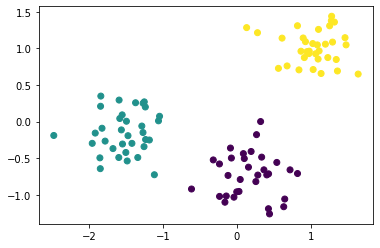

In [126]:
#plot the new labels
# YOUR CODE HERE

plt.scatter(new_df['0'], new_df['1'], c=new_labels, cmap='viridis')

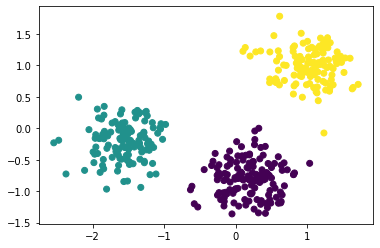

In [135]:
#plot all the points together

# YOUR CODE HERE
df2 = df + new_df
frames = [df, new_df,]
df2 = pd.concat(frames)
#print(df2)
label2 = np.concatenate((labels, new_labels), axis=0) # + new_labels
#print(type(labels))
plt.scatter(df2['0'], df2['1'], c=label2, cmap='viridis')